# Метод работы с webcam

Здесь представлен код ....

In [6]:
import cv2
import numpy as np
from IPython.display import display, Image

Released Video Resource


In [31]:
# https://towardsdatascience.com/face-detection-in-2-minutes-using-opencv-python-90f89d7c0f81

def find_faces(image):
    # Load the cascade
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')
    left_eye_cascade = cv2.CascadeClassifier('haarcascade_lefteye_2splits.xml')
    right_eye_cascade = cv2.CascadeClassifier('haarcascade_righteye_2splits.xml')
    # Convert into grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.2, 20)
    lefteyes = left_eye_cascade.detectMultiScale(gray, 1.2, 30)
    righteyes = right_eye_cascade.detectMultiScale(gray, 1.2, 30)
    # Draw rectangle around the faces
    
    left_eye_center = (0,0)
    ritgh_eye_center = (0,0)
    
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        #print('Width = ', w, 'Height = ', h, end='\r')

    for (x, y, w, h) in lefteyes:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 0), 2)
        left_eye_center = (x + w*0.5, y + h*0.5)
        break
        
    for (x, y, w, h) in righteyes:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 255), 2)
        ritgh_eye_center = (x + w*0.5, y + h*0.5)
        break
        
    return image, left_eye_center, ritgh_eye_center


In [5]:
def do_something(image):
    
    return find_faces(image)

In [29]:
import math
def distance(A, B):
    x1, y1 = A
    x2, y2 = B
    return  math.sqrt((x1-x2)**2 + (y1-y2)**2)

In [34]:
def put_text(image, text):
    font                   = cv2.FONT_HERSHEY_SIMPLEX
    bottomLeftCornerOfText = (30,30)
    fontScale              = 2
    fontColor              = (255,255,255)
    lineType               = 2

    cv2.putText(image, text, 
        bottomLeftCornerOfText, 
        font, 
        fontScale,
        fontColor,
        lineType)
    return image

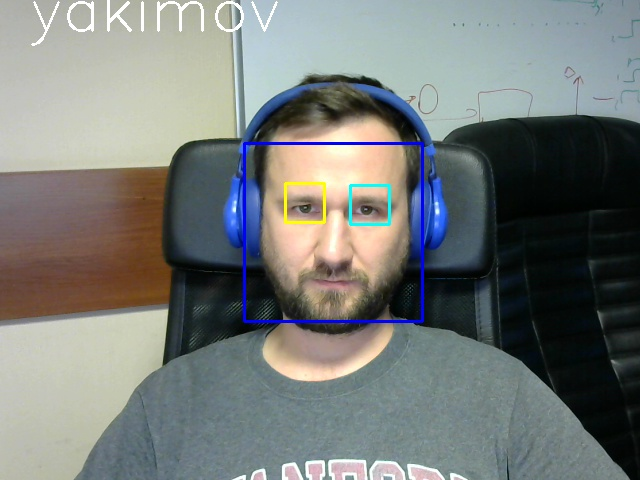

In [ ]:
video = cv2.VideoCapture(0)
display_handle=display(None, display_id=True)

try:
    while True:
        ret, frame = video.read()
        if not ret:
            # Release the Video Device if ret is false
            video.release()
            # Message to be displayed after releasing the device
            print ("Released Video Resource")
            break
        #frame = cv2.flip(frame, 1) # if your camera reverses your image
        frame, left_eye_center, right_eye_center = do_something(frame)
 
        eye_distance = distance(left_eye_center, right_eye_center)
    
        print('Left = ', left_eye_center, 'Right = ', right_eye_center, 'Distance = ', eye_distance, end='\r')
        
        if (abs(eye_distance - 65) < 3):
            frame = put_text(frame, 'yakimov')
        
        _, frame = cv2.imencode('.jpeg', frame)
        display_handle.update(Image(data=frame.tobytes()))
except KeyboardInterrupt:
    pass
finally:
    video.release()
    display_handle.update(None)

In [98]:
# References
# https://www.analyticsvidhya.com/blog/2021/06/learn-how-to-implement-face-recognition-using-opencv-with-python/
# https://towardsdatascience.com/face-detection-in-2-minutes-using-opencv-python-90f89d7c0f81
# https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Object_Detection_Face_Detection_Haar_Cascade_Classifiers.php

In [26]:
left_eye_center

(355.0, 191.0)

In [28]:
right_eye_center-left_eye_center

TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'